In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Temperatur Modell

In [124]:
class Temperature:
    
    days = 365
    
    def __init__(self, hot_year: bool = False, temp_var: int = 2) -> None:
        self.hot_year = hot_year
        self.temp_var = temp_var
        
    def calculate_temperature(self) -> np.ndarray:
        offset = 15 if self.hot_year else 11
        days = np.arange(1, 366)
        temps = 1 + 15 * np.sin(2 * np.pi * (days - 92) / 365) + np.random.uniform(-self.temp_var, self.temp_var, 365) + offset
        return temps
    

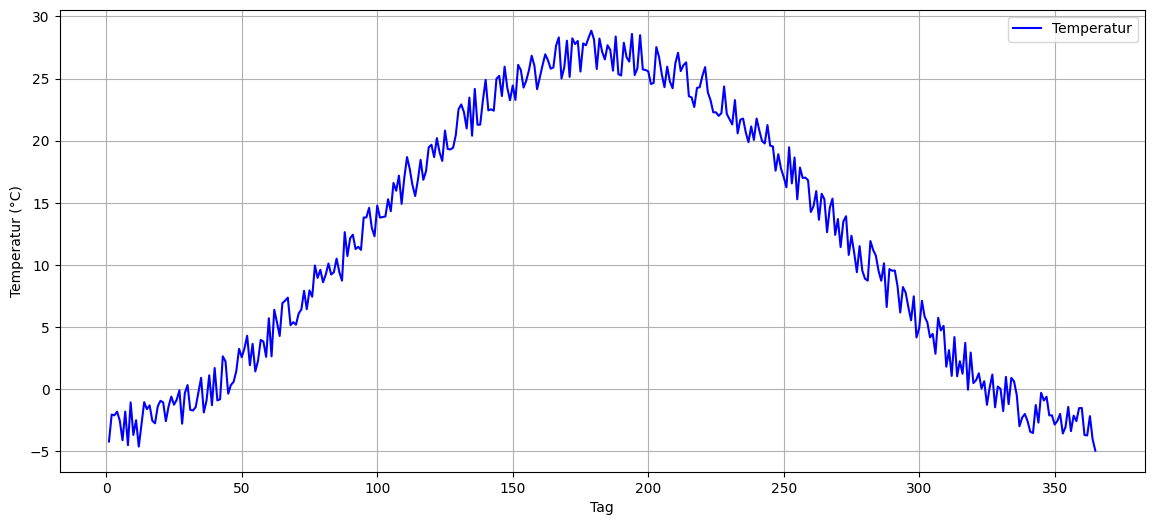

In [163]:
days = np.arange(1, 366)
temps = Temperature().calculate_temperature()

plt.figure(figsize=(14, 6))
plt.plot(days, temps, label='Temperatur', color='blue')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.grid()
plt.legend()
plt.show()

### MC Simulation

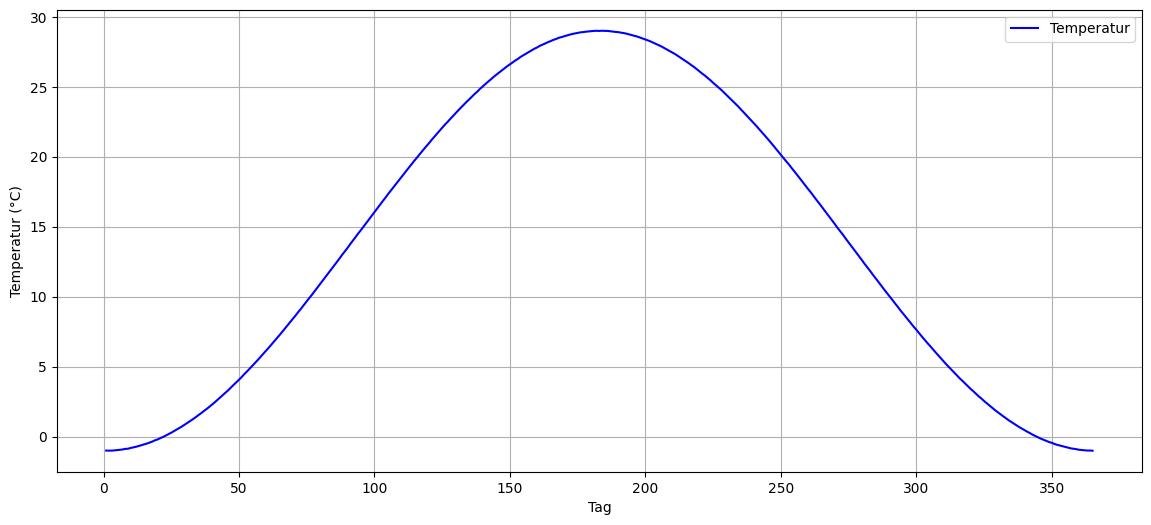

In [162]:
n = 100_000

temps = []
for _ in range(n):
    temp = Temperature(hot_year=np.random.choice([True, False]), temp_var=np.random.randint(1, 5)).calculate_temperature()
    temps.append(temp)

avg_temp = np.mean(temps, axis=0)
days = np.arange(1, 366)
temps = Temperature().calculate_temperature()

plt.figure(figsize=(14, 6))
plt.plot(days, avg_temp, label='Temperatur', color='blue')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.grid()
plt.legend()
plt.show()

In [ ]:
FIX_DAYS = 365

# Kosten: Variable Parameter, können bei bedarf geändert werden
Miete = 100
Strom = 30
Personal = 50
VAR_FIXED_COST_PER_DAY = Miete + Strom + Personal
VAR_COSTS_PER_ICE = 0.15 # €

# Temperatur: Variable Parameter, können bei bedarf geändert werden
TEMP_VAR = 2 # +- 2°C

HOT_YEAR = False
OFFSET = 15 if HOT_YEAR else 11
    
DAYS = np.arange(1, FIX_DAYS+1)
temperaturen = 1 + 15 * np.sin(2 * np.pi * (DAYS - 92) / 365) + np.random.uniform(-TEMP_VAR, TEMP_VAR, 365) + OFFSET
plt.figure(figsize=(14, 6))
plt.plot(DAYS, temperaturen, label='Temperatur', color='blue')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.title('Angepasste Temperatur über das Jahr, beginnend mit kälterem Wetter')
plt.grid()
plt.legend()
plt.show()


In [ ]:
# Feste Parameter
tage_im_jahr = 365
fixkosten_pro_tag = 100  # Beispielwert
variable_kosten_pro_kunde = 2  # Beispielwert
# Annahme: Mehr Kunden und höherer Umsatz bei höheren Temperaturen
kunden_basis = 50  # Basis-Kundenanzahl bei durchschnittlicher Temperatur
kunden_temperatur_faktor = 5  # Wie stark die Temperatur die Kundenanzahl beeinflusst
umsatz_pro_kunde_basis = 5  # Durchschnittlicher Umsatz pro Kunde bei durchschnittlicher Temperatur
umsatz_temperatur_faktor = 0.5  # Wie stark die Temperatur den Umsatz pro Kunde beeinflusst

# Berechnungen
kundenanzahl = kunden_basis + (temperaturen - 15) * kunden_temperatur_faktor
kundenanzahl = np.maximum(kundenanzahl, 0)  # Verhindern negativer Kundenanzahlen
umsatz_pro_kunde = umsatz_pro_kunde_basis + (temperaturen - 15) * umsatz_temperatur_faktor
gesamtumsatz = kundenanzahl * umsatz_pro_kunde
gesamtkosten = fixkosten_pro_tag * np.ones(tage_im_jahr) + variable_kosten_pro_kunde * kundenanzahl
profit = gesamtumsatz - gesamtkosten

# Ergebnisse in einem DataFrame speichern
ergebnisse = pd.DataFrame({
    'Tag': DAYS,
    'Temperatur': temperaturen,
    'Kundenanzahl': kundenanzahl,
    'UmsatzProKunde': umsatz_pro_kunde,
    'Gesamtumsatz': gesamtumsatz,
    'Gesamtkosten': gesamtkosten,
    'Profit': profit
})

# Visualisierung der Temperatur und des Profits über das Jahr
plt.figure(figsize=(30, 6))

plt.subplot(1, 2, 1)
plt.plot(DAYS, temperaturen, label='Temperatur')
plt.xlabel('Tag')
plt.ylabel('Temperatur (°C)')
plt.title('Temperatur über das Jahr')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(DAYS, profit, label='Profit', color='green')
plt.xlabel('Tag')
plt.ylabel('Profit (€)')
plt.title('Täglicher Profit über das Jahr')
plt.legend()

plt.tight_layout()
plt.show()

# Jahresübersicht
jahr_summary = ergebnisse[['Gesamtumsatz', 'Gesamtkosten', 'Profit']].sum()
jahr_summary